# GRIP : The Sparks Foundation
Data Science and Business Analytics Internship 


Task 4 Exploratory Data Analysis - Terrorism

# Step -1: Importing the required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import os
import mpl_toolkits
import json

dataset = https://bit.ly/2TK5Xn5

In [8]:
df = pd.read_csv('C:\\Users\\Asus Bq512TS\\Downloads\\task4.csv', encoding='latin1', low_memory=False)


In [9]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [11]:
df.shape

(181691, 135)

In [12]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# Cleaning or pre-processing of data

In [18]:
import pandas as pd

# Columns that you want to select
usecols = [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]

# Column name mapping (renaming columns)
renamed_cols = {
    'iyear': 'uyear',
    'country_txt': 'country_txtt',
    'region_txt': 'region_txtt',
    'latitude': 'lat',
    'longitude': 'long',
    'provstate': 'provsstate',
    'attacktype1_txt': 'attackedtype1',
    'targtype1_txt': 'targettype1',
    'weaptype1_txt': 'weapontype',
    'nperps': 'nperhps',
    'nkill': 'nkilled',
    'nkillter': 'nkilledter',
    'nwound': 'nwounded',
    'nwoundte': 'nwoundedte',
    'propextent_txt': 'propertyextent'
}




In [21]:
# Read the dataset
df = pd.read_csv('C:\\Users\\Asus Bq512TS\\Downloads\\task4.csv', encoding='ISO-8859-1', usecols=usecols)
df.rename(columns=renamed_cols, inplace=True)
print('Data read Successfully')

Data read Successfully


In [22]:
df

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,long,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0.0,1,...,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,...,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,...,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,1,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0.0,1,...,Al-Shabaab,-99.0,1.0,Firearms,1.0,0.0,2.0,0.0,-9,NaN
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0.0,1,...,Muslim extremists,-99.0,0.0,Explosives,2.0,0.0,7.0,0.0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0.0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0.0,0,...,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,-9,NaN


In [24]:
# Removing the unknown values from the columns
df = df[pd.notnull(df.lat)]
df = df[pd.notnull(df.long)]
print("Unknown values have been removed from the columns")


Unknown values have been removed from the columns


In [25]:
df.dtypes

uyear               int64
extended            int64
country_txtt       object
region_txtt        object
provsstate         object
city               object
lat               float64
long              float64
multiple          float64
success             int64
suicide             int64
attackedtype1      object
targettype1        object
gname              object
nperhps           float64
claimed           float64
weapontype         object
nkilled           float64
nkilledter        float64
nwounded          float64
nwoundedte        float64
property            int64
propertyextent     object
dtype: object

In [26]:
df.head(10)

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,long,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundedte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0.0,1,...,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,...,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,...,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,1,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,1,NaN
5,1970,0,United States,North America,Illinois,Cairo,37.005105,-89.176269,0.0,1,...,Black Nationalists,-99.0,0.0,Firearms,0.0,0.0,0.0,0.0,1,Minor (likely < $1 million)
6,1970,0,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0.0,0,...,Tupamaros (Uruguay),3.0,NaN,Firearms,0.0,NaN,0.0,NaN,0,NaN
7,1970,0,United States,North America,California,Oakland,37.791927,-122.225906,0.0,1,...,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,1,Minor (likely < $1 million)
8,1970,0,United States,North America,Wisconsin,Madison,43.076592,-89.412488,0.0,1,...,New Year's Gang,1.0,1.0,Incendiary,0.0,0.0,0.0,0.0,1,Minor (likely < $1 million)
9,1970,0,United States,North America,Wisconsin,Madison,43.072950,-89.386694,0.0,1,...,New Year's Gang,1.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,Minor (likely < $1 million)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177134 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uyear           177134 non-null  int64  
 1   extended        177134 non-null  int64  
 2   country_txtt    177134 non-null  object 
 3   region_txtt     177134 non-null  object 
 4   provsstate      176725 non-null  object 
 5   city            176708 non-null  object 
 6   lat             177134 non-null  float64
 7   long            177134 non-null  float64
 8   multiple        177133 non-null  float64
 9   success         177134 non-null  int64  
 10  suicide         177134 non-null  int64  
 11  attackedtype1   177134 non-null  object 
 12  targettype1     177134 non-null  object 
 13  gname           177134 non-null  object 
 14  nperhps         109529 non-null  float64
 15  claimed         114621 non-null  float64
 16  weapontype      177134 non-null  object 
 17  nkilled   

In [33]:
unique_counts = df.nunique()


In [34]:
df['uyear'].value_counts()


2014    16794
2015    14861
2016    13530
2013    11926
2017    10853
2012     8470
2011     5048
1992     4832
2010     4818
2008     4756
2009     4706
1991     4405
1989     4147
1990     3648
1988     3471
1994     3295
1984     3198
2007     3190
1997     2996
1987     2989
1995     2920
1996     2909
2006     2716
1985     2680
1986     2680
1983     2670
1980     2561
1979     2533
1981     2469
1982     2408
2005     1985
2001     1883
2000     1772
1978     1455
1999     1341
2002     1310
1977     1292
2003     1263
2004     1137
1976      900
1998      891
1975      727
1970      643
1974      577
1972      551
1973      465
1971      463
Name: uyear, dtype: int64

# Total count of region in the Dataset

In [35]:
df['region_txtt'].value_counts()

Middle East & North Africa     49577
South Asia                     44479
South America                  18110
Sub-Saharan Africa             17011
Western Europe                 16482
Southeast Asia                 11946
Central America & Caribbean     9344
Eastern Europe                  5117
North America                   3450
East Asia                        794
Central Asia                     548
Australasia & Oceania            276
Name: region_txtt, dtype: int64

# Total Counts of Cities in the Dataset

In [36]:
df['city'].value_counts()

Baghdad                7589
Unknown                7534
Karachi                2651
Lima                   2359
Mosul                  2265
                       ... 
Buruto                    1
Beniboye                  1
Daggar                    1
Khok Pho (District)       1
Kubentog                  1
Name: city, Length: 35059, dtype: int64

# Total counts of Attack type in the Dataset

In [38]:
df['attackedtype1'].value_counts()


Bombing/Explosion                      86843
Armed Assault                          41107
Assassination                          18819
Hostage Taking (Kidnapping)            10671
Facility/Infrastructure Attack         10186
Unknown                                 6931
Unarmed Assault                          986
Hostage Taking (Barricade Incident)      962
Hijacking                                629
Name: attackedtype1, dtype: int64

In [39]:
df.describe()

,uyear,extended,lat,long,multiple,success,suicide,nperhps,claimed,nkilled,nkilledter,nwounded,nwoundedte,property
count,177134.000000,177134.000000,177134.000000,1.771340e+05,177133.000000,177134.000000,177134.000000,109529.000000,114621.000000,167355.000000,113717.000000,161466.000000,111563.000000,177134.000000
mean,2002.913150,0.044644,23.498444,-4.586957e+02,0.138049,0.888073,0.037299,-65.705959,0.051457,2.361591,0.509335,3.195242,0.107652,-0.566989
std,13.210935,0.206522,18.569247,2.047790e+05,0.344952,0.315277,0.189495,217.100331,1.086410,11.479935,4.211994,36.357366,1.494344,3.144790
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,-99.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1991.000000,0.000000,11.510545,4.545640e+00,0.000000,1.000000,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,0.000000,31.467463,4.324651e+01,0.000000,1.000000,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,0.000000,34.685087,6.871033e+01,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
max,2017.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,25000.000000,1.000000,1570.000000,500.000000,8191.000000,200.000000,1.000000


# correlation among the all columns 

In [41]:
df.corr

<bound method DataFrame.corr of         uyear  extended        country_txtt                  region_txtt  \
0        1970         0  Dominican Republic  Central America & Caribbean   
1        1970         0              Mexico                North America   
2        1970         0         Philippines               Southeast Asia   
3        1970         0              Greece               Western Europe   
4        1970         0               Japan                    East Asia   
...       ...       ...                 ...                          ...   
181686   2017         0             Somalia           Sub-Saharan Africa   
181687   2017         0               Syria   Middle East & North Africa   
181688   2017         0         Philippines               Southeast Asia   
181689   2017         0               India                   South Asia   
181690   2017         0         Philippines               Southeast Asia   

             provsstate           city        lat      

In [42]:
# slicing 

In [43]:
df.iloc[0]

uyear                                    1970
extended                                    0
country_txtt               Dominican Republic
region_txtt       Central America & Caribbean
provsstate                                NaN
city                            Santo Domingo
lat                                 18.456792
long                               -69.951164
multiple                                  0.0
success                                     1
suicide                                     0
attackedtype1                   Assassination
targettype1       Private Citizens & Property
gname                                  MANO-D
nperhps                                   NaN
claimed                                   NaN
weapontype                            Unknown
nkilled                                   1.0
nkilledter                                NaN
nwounded                                  0.0
nwoundedte                                NaN
property                          

In [44]:
df.iloc[:,1]


0         0
1         0
2         0
3         0
4         0
         ..
181686    0
181687    0
181688    0
181689    0
181690    0
Name: extended, Length: 177134, dtype: int64

# VISUALISATION 

HEAT  MAP 

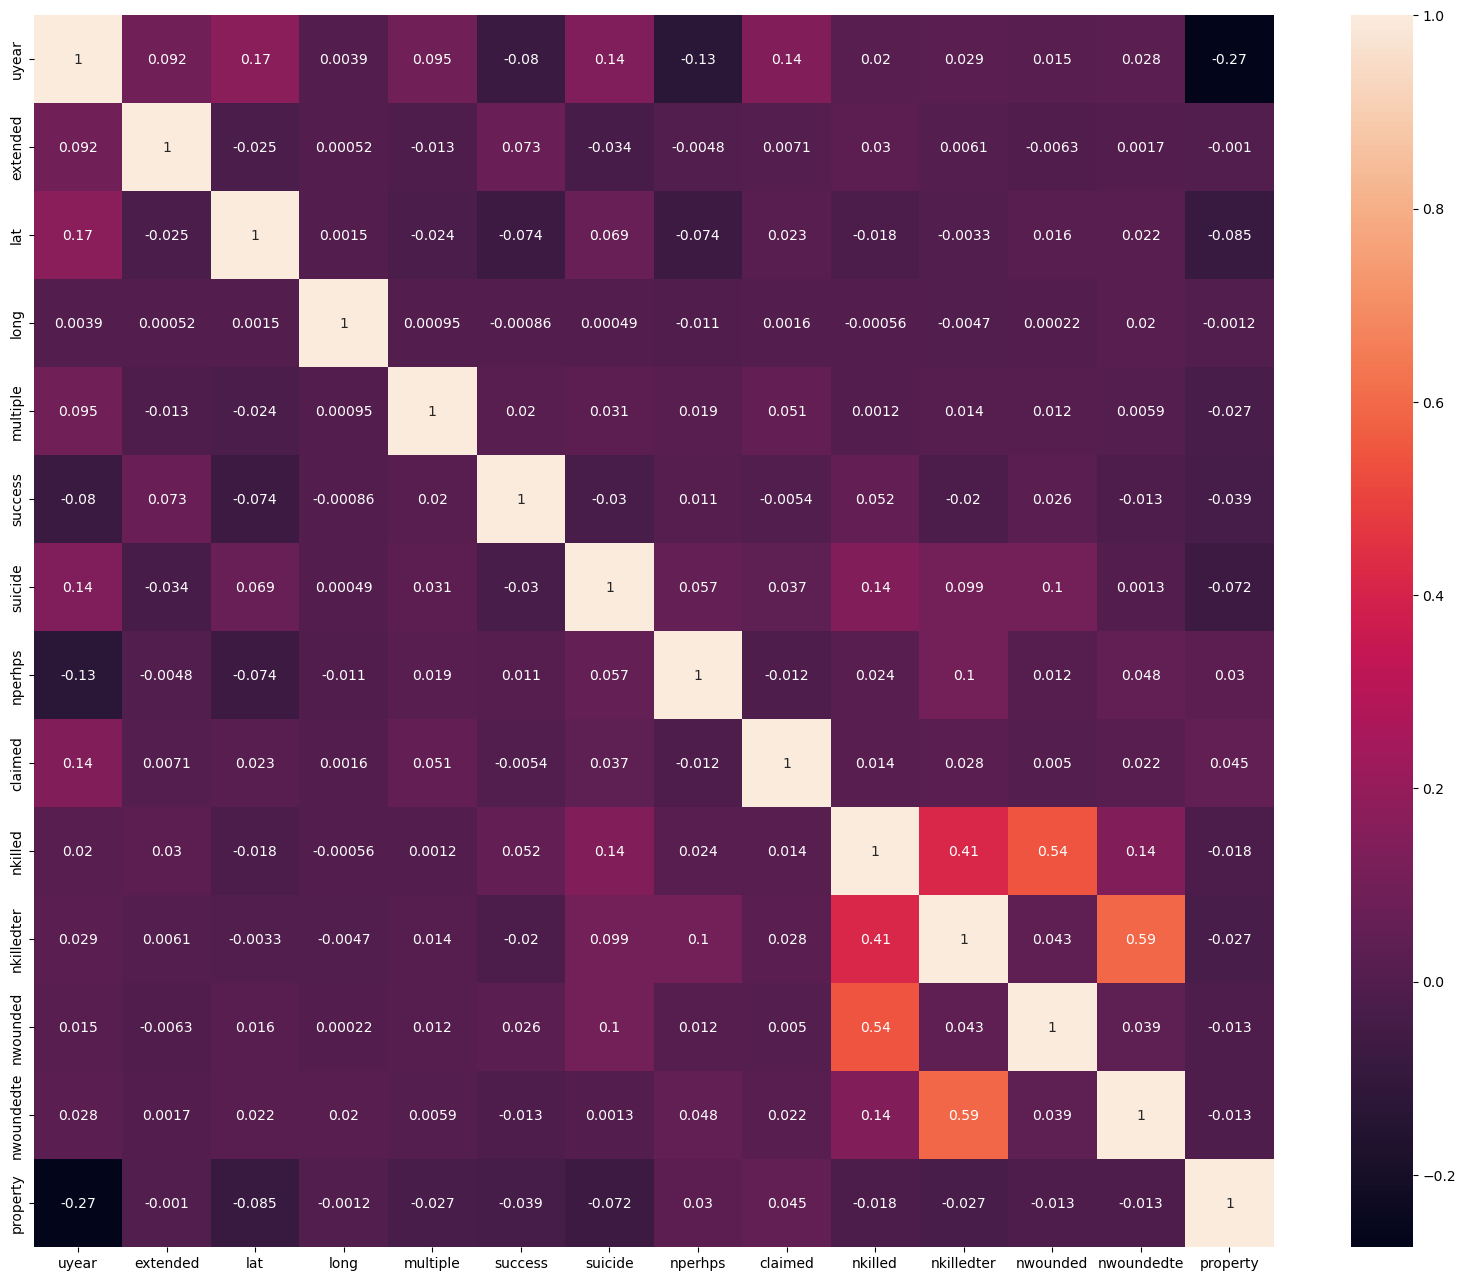

In [45]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.corr(), annot =True)
plt.show()

In [47]:
# Create a heatmap with a custom colormap (YlOrRd) and annotations
# define corr = {values }
#sns.heatmap(corr, cmap='YlOrRd', annot=True)
#plt.show()
# but here we create it among all so we do onoly df.corr 

# Plot of Attacks types

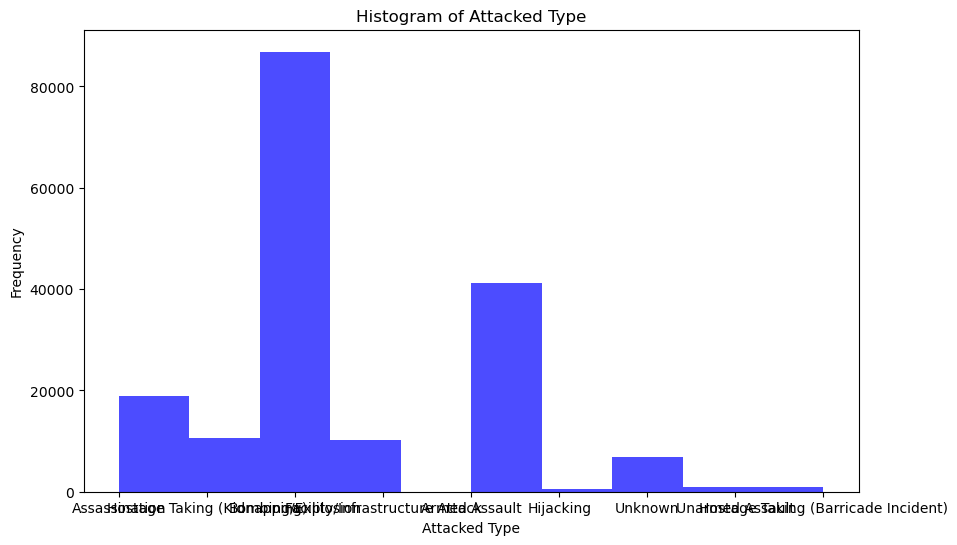

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['attackedtype1'], bins=10, color='blue', alpha=0.7)  # Adjust the number of bins as needed
plt.xlabel('Attacked Type')

plt.ylabel('Frequency')
plt.title('Histogram of Attacked Type')
plt.show()


# Plot by Regions

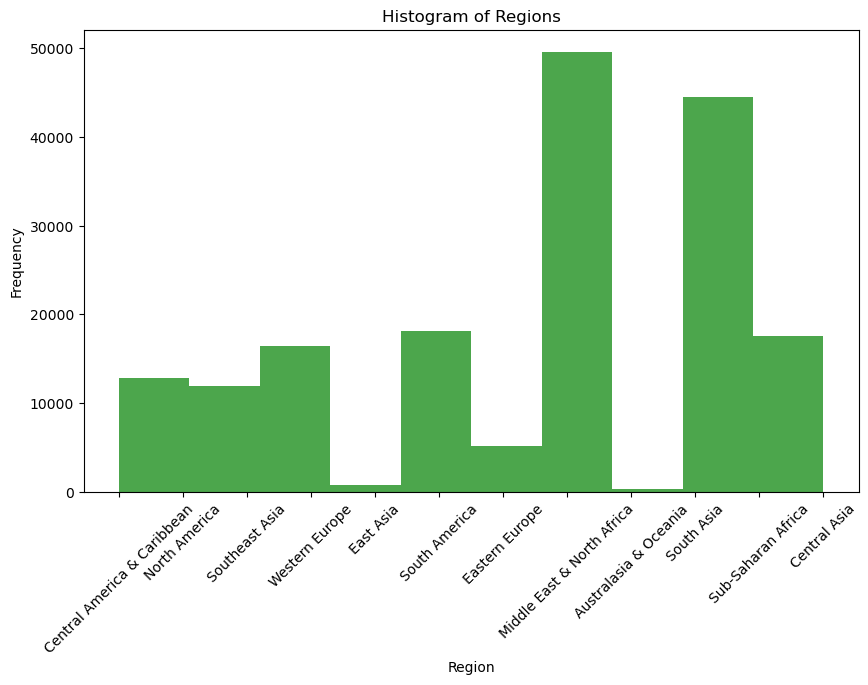

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['region_txtt'], bins=10, color='green', alpha=0.7)  # Adjust the number of bins as needed
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Histogram of Regions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Is code mein, plt.hist() function ka istemal kiya gaya hai region_txtt column ke values ke histogram plot banane ke liye. Aap bins parameter ko customize karke bins ki sankhya ko adjust kar sakte hain

# Number of Terrorist activities by Regions

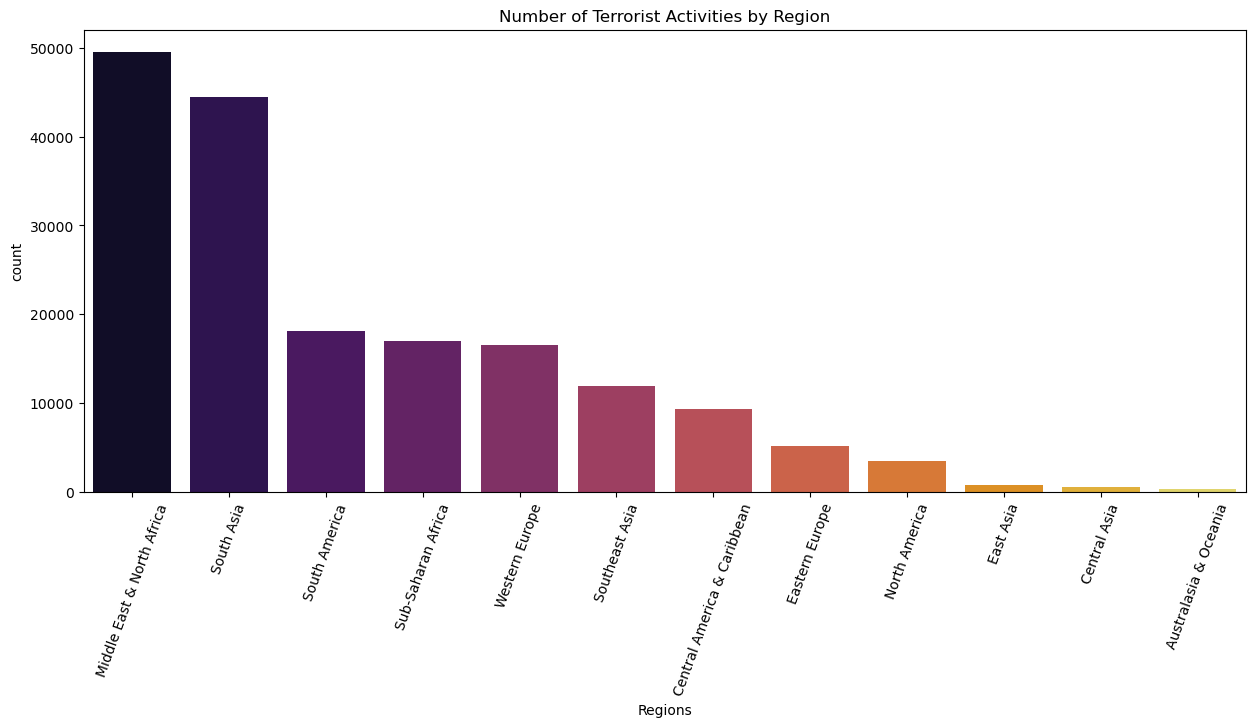

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15, 6))
sns.countplot(x='region_txtt', data=df, palette='inferno', order=df['region_txtt'].value_counts().index)
plt.xticks(rotation=70)
plt.xlabel('Regions')
plt.title('Number of Terrorist Activities by Region')
plt.show()


TypeError: countplot() got multiple values for argument 'data'

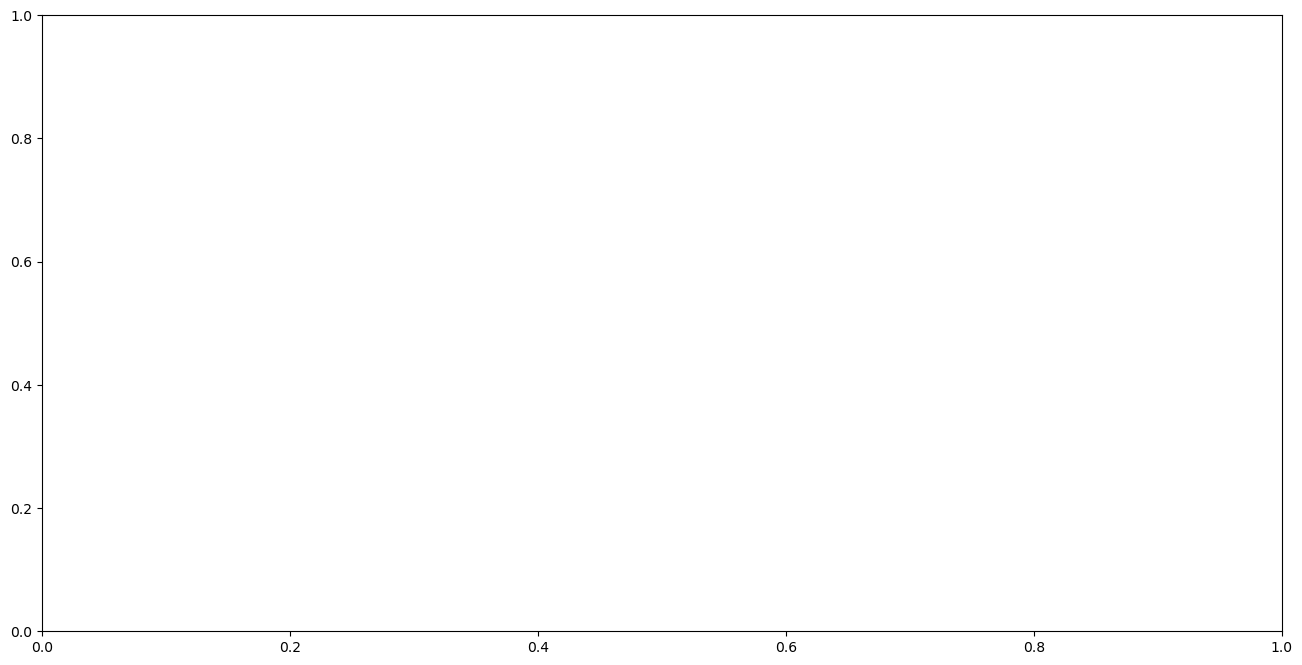

In [54]:
plt.subplots(figsize =(16,8))
sns.countplot('uyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',8))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number of Terrorist Activities by Each Year')
plt.show()

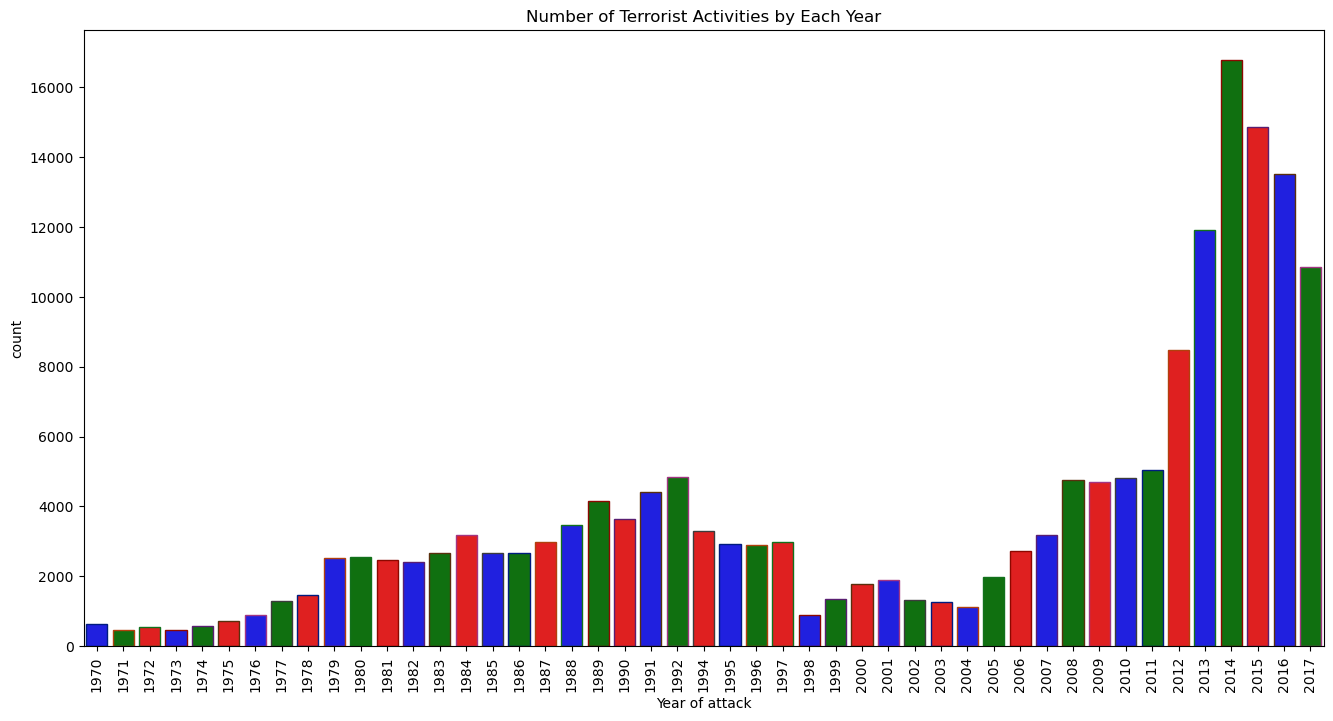

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with only three colors
custom_palette = ['blue', 'green', 'red']

plt.subplots(figsize=(16, 8))
sns.countplot(x='uyear', data=df, palette=custom_palette, edgecolor=sns.color_palette('dark', 8))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number of Terrorist Activities by Each Year')
plt.show()


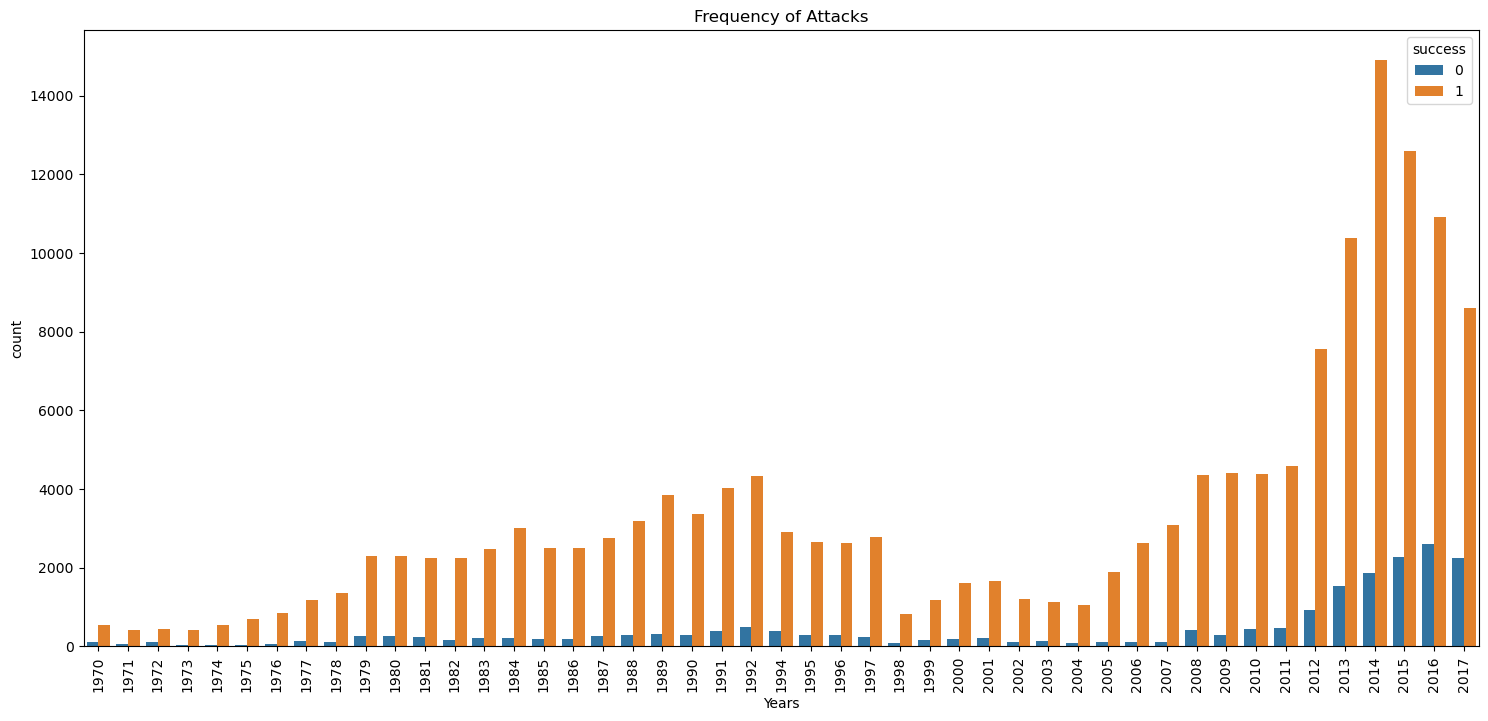

In [58]:
plt.subplots(figsize =(18,8))
sns.countplot(x=df['uyear'], hue ='success', data = df)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Frequency of Attacks')
plt.show()

# Attacking Methods by Terrorists

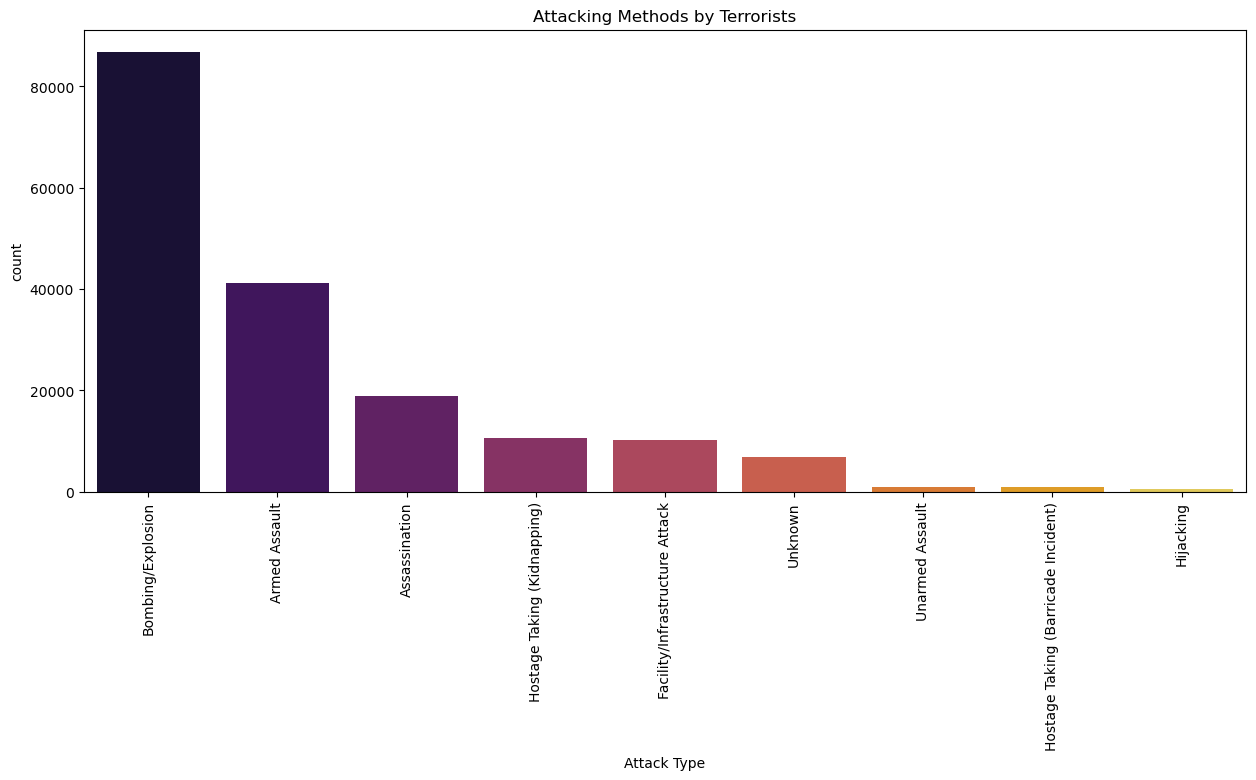

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a countplot with a specified figure size
plt.subplots(figsize=(15, 6))

# Use sns.countplot to create the countplot
sns.countplot(x='attackedtype1', data=df, palette='inferno', order=df['attackedtype1'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the x-axis label
plt.xlabel('Attack Type')

# Set the plot title
plt.title('Attacking Methods by Terrorists')

# Display the plot
plt.show()


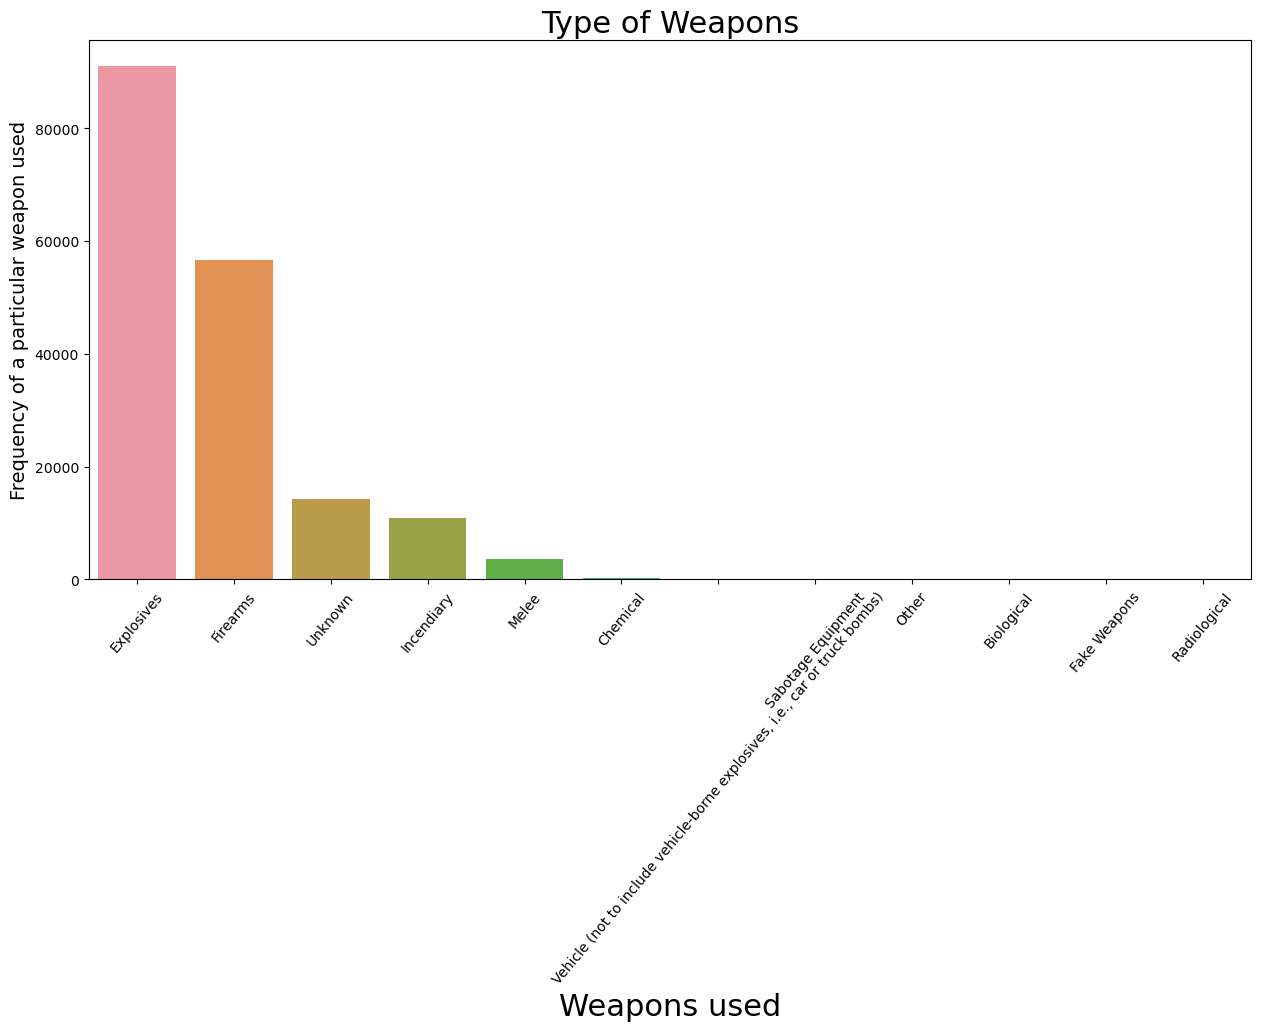

In [62]:
plt.figure(figsize =(15,7))
sns.barplot(x=df['weapontype'].value_counts()[:50].index,y =df['weapontype'].value_counts()[:50].values)
plt.xticks(rotation=50)
plt.xlabel('Weapons used', fontsize =22)
plt.ylabel("Frequency of a particular weapon used", fontsize =14)
plt.title("Type of Weapons", fontsize =22)
plt.show()

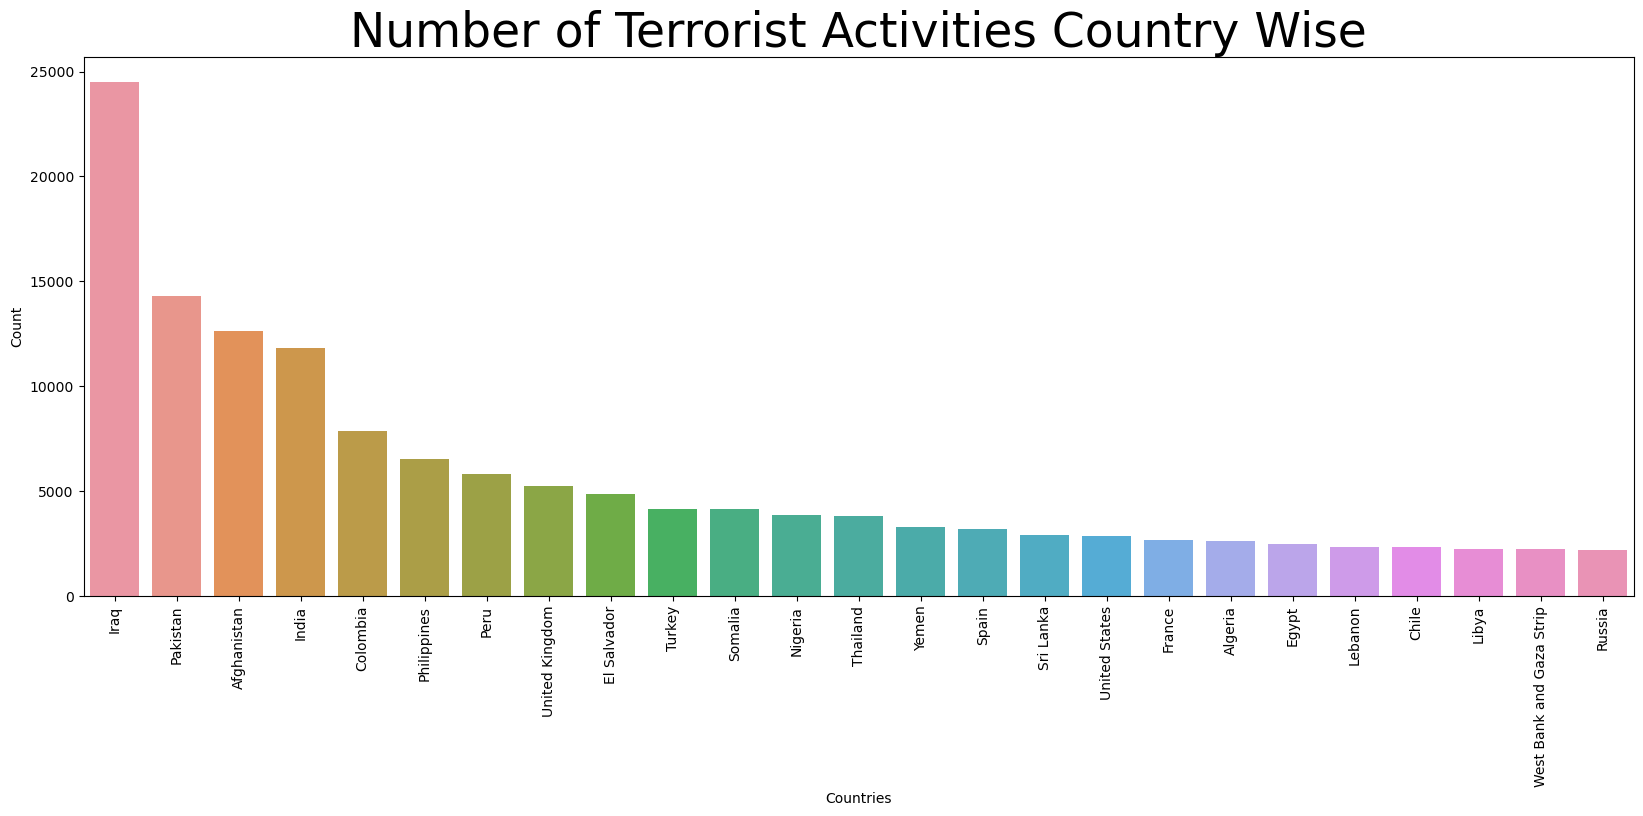

In [66]:
plt.figure(figsize =(20,7))
sns.barplot(x=df['country_txtt'].value_counts()[:25].index,y =df['country_txtt'].value_counts()[:25].values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title("Number of Terrorist Activities Country Wise", fontsize =34)
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

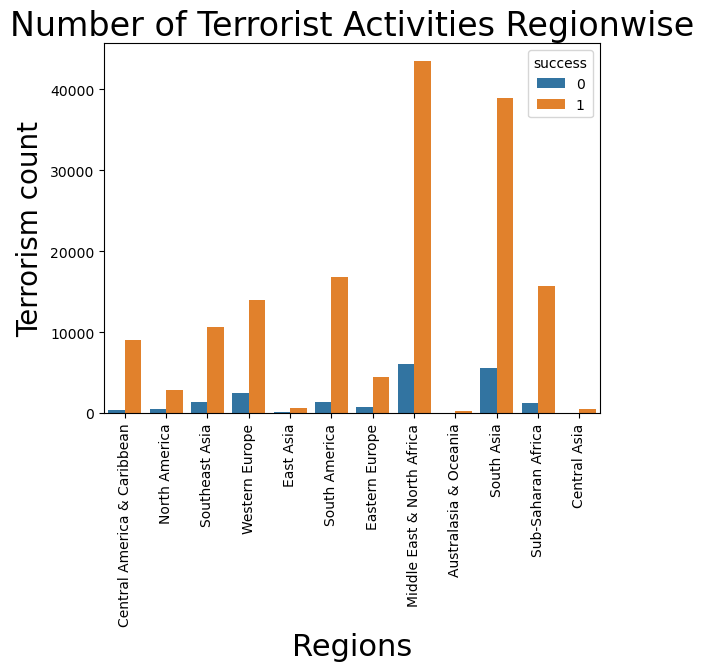

In [64]:
sns.countplot(x=df['region_txtt'], hue ='success', data=df)
plt.xlabel("Regions", fontsize =22)
plt.xticks(rotation=90)
plt.ylabel("Terrorism count", fontsize =20)
plt.title("Number of Terrorist Activities Regionwise", fontsize =24)

Conclusion :
Countries with the highest number of Terrorist Attacks: Iraq
Region with the highest number of Terrorist Attacks:Middle East & North Africa
Maximum number of people killed by a single terrorist attack are 1570 in iraq
Year with the more attacks: 2014
Month with the most Attacks: 5
Most Attack types: Bombing/Explosions
Year with Highest number of frequencies of attacks : 2014